# K-means clustering

**Batch**

In [6]:
# Define Euclidean distance 
def eucl_dist(a, b):
    return np.linalg.norm(a- b)

# Define error function
def error_func(p, distance):
    return np.sum(distance[p,range(p.shape[0])])/(p.shape[0])

In [7]:
def batch_K(M):
    # Initialization
    t_max = 5
    errors = []
    clusters = np.zeros(t_max)
    distances = np.zeros((M,n))
    iterations = np.arange(0,t_max,1) 
    centers =  np.ones((M,2))* mean + (np.random.rand(M,2))*2-1


    # Optimization
    for t in range(t_max):
        for j in range(M):
            for i in range(n):
                distances[j,i] = eucl_dist(centers[j,:], data[i])
        labels = np.argmin(distances,axis=0)
        for j in range(M):
            mean_prot1 = np.mean(data[labels == j,0])
            mean_prot2 = np.mean(data[labels == j,1])
            mean_prot = np.array([mean_prot1, mean_prot2])
            centers[j,:] = mean_prot
        errors.append(error_func(labels, distances))
        

        # Visualization
        plt.figure();
        for j in range(M):
            plt.scatter(data[labels == j,0], data[labels == j,1])
        plt.scatter(centers[:,0],centers[:,1],edgecolor='k', s=100)
        plt.title('Data points and centers at step {}'.format(t+1))
    plt.figure()
    plt.plot(iterations, errors)
    plt.xticks(np.arange(0, t_max, 1))
    plt.title('Error per iteration')
    try:
        voronoi_plot_2d(Voronoi(centers))
        plt.title('Voronoi-Tesselation plot')
    except:
        pass

**Online**

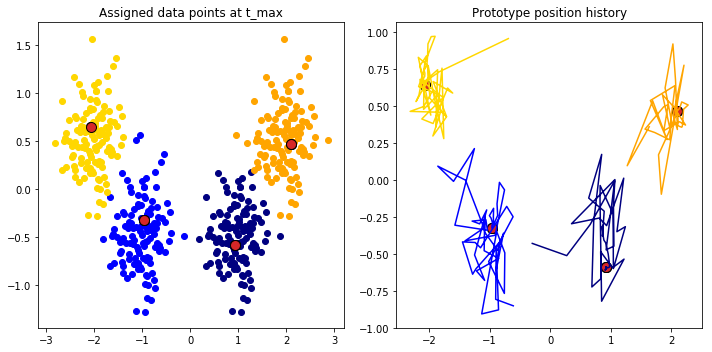

In [18]:
def online_K(M):
    # Initialization
    eps = .6
    tau = .95
    lern_rate = eps
    t_max = n
    centers_history = np.zeros((M,t_max,2))
    distances = np.zeros((M,))
    iterations = np.arange(0,t_max,1)
    color = np.array(['navy','blue','orange','gold'])
    centers =  np.ones((M,2))*mean + (np.random.rand(M,2))*2-1


    #Optimization
    for t in range(t_max):
        for j in range(4):
            distances[j] = eucl_dist(centers[j,:], data[t])
        labels = np.argmin(distances,axis=0)

        if t > t_max/4:
            lern_rate = lern_rate*tau    
        difference = data[t] - centers[labels]
        centers[labels,:] = centers[labels,:] + lern_rate * difference   
        centers_history[:,t,:]=centers
    
    distances=np.zeros((M,n))
    for j in range(M):
        for i in range(n):
            distances[j,i] = eucl_dist(centers[j,:], data[i])
    labels = np.argmin(distances,axis=0)


    #Visualization
    plt.figure(figsize = (10,5));

    for j in range(M):
        plt.subplot(1,2,1);
        # Visualize protorypes and colored data points
        plt.scatter(data[labels == j,0], data[labels == j,1],c=color[j])
        plt.scatter(centers[:,0], centers[:,1], edgecolor='k', s=100)
        plt.title("Assigned data points at t_max")
        plt.subplot(1,2,2);
        # Visualize final prototypes and all their previous positions
        plt.plot(centers_history[j,:,0],centers_history[j,:,1],c = color[j])
        plt.scatter(centers[:,0], centers[:,1], edgecolor='k', s=100)
        plt.title('Prototype position history')
        plt.tight_layout();